##Intro to KNN Classification
KNN Classification predicts the class of a new data point by looking at the majority class among its K nearest neighbors in the feature space.

<img src ="https://stataiml.com/images/knn/knn_algorithm.png" width ="400">

# 🍷 KNN Classification – Wine Quality (good / great / best)

In this section, we use **K-Nearest Neighbors Classification** to predict **wine quality categories** from physicochemical properties.

**Dataset:** `winequality-red.csv`  
**Original target:** `quality` (integer score, typically 3–8)

We convert the numeric `quality` score into **three classes**:

- `good`  → quality <= 5  
- `great` → quality == 6  
- `best`  → quality >= 7  

These labels represent increasing wine quality.

We will:
1. Load and inspect the wine data  
2. Create a new categorical label: `quality_label` (`good`, `great`, `best`)  
3. Prepare features (`X_cls`) and labels (`y_cls`)  
4. Scale the features  
5. Train `KNeighborsClassifier`  
6. Evaluate using accuracy, F1-score, and confusion matrix  


##Load & Inspect Wine Data


In [ ]:
import pandas as pd

wine_df = pd.read_csv("/content/drive/MyDrive/INDE 577 github Jupyter files/Supervised Learning/K Nearest Neighbors/winequality-red (1).csv", sep=";")

print(wine_df.head())
print(wine_df["quality"].value_counts().sort_index())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

##Create Quality Labels (good / great / best)
We map numeric `quality` scores into three categories:

- `good`  → quality <= 5  
- `great` → quality == 6  
- `best`  → quality >= 7  

We store this in a new column `quality_label`.


In [ ]:
def map_quality_to_label(q):
    if q <= 5:
        return "good"
    elif q == 6:
        return "great"
    else:  # q >= 7
        return "best"

wine_df["quality_label"] = wine_df["quality"].apply(map_quality_to_label)

print(wine_df[["quality", "quality_label"]].head())
print("\nLabel distribution:")
print(wine_df["quality_label"].value_counts())


   quality quality_label
0        5          good
1        5          good
2        5          good
3        6         great
4        5          good

Label distribution:
quality_label
good     744
great    638
best     217
Name: count, dtype: int64


##Prepare Features and Target (Classification)

We use:

- **Target (`y_cls`)**: `quality_label` (`good`, `great`, `best`)  
- **Features (`X_cls`)**: all original physicochemical columns (we drop `quality` and `quality_label` from features)


In [ ]:
# Target: 3-class labels
y_cls = wine_df["quality_label"]

# Features: all physicochemical properties
X_cls = wine_df.drop(columns=["quality", "quality_label"])

print("Features shape:", X_cls.shape)
print("Target shape:", y_cls.shape)
X_cls.head()


Features shape: (1599, 11)
Target shape: (1599,)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


##Train/Test Split + Scaling (Classification)

We split into **training** and **test** sets (with stratification to preserve class ratios) and scale the features for KNN distance.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

cls_scaler = StandardScaler()
X_cls_train_scaled = cls_scaler.fit_transform(X_cls_train)
X_cls_test_scaled = cls_scaler.transform(X_cls_test)


##Train KNN Classifier

We train a **K-Nearest Neighbors Classifier**:

- `n_neighbors=7`: prediction based on 7 nearest wines  
- `weights="distance"`: closer neighbors have more influence  


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_cls = KNeighborsClassifier(
    n_neighbors=7,
    weights="distance",
    metric="minkowski"
)

knn_cls.fit(X_cls_train_scaled, y_cls_train)

print("KNN Classifier training complete.")


KNN Classifier training complete.


##Evaluate KNN Classification

We evaluate the KNN classifier using:

- **Accuracy** – overall correct predictions  
- **Precision, Recall, F1-score** (macro-averaged for multiple classes)  
- **Confusion Matrix** – to see how well it distinguishes between `good`, `great`, and `best`  


KNN Classification – Metrics (macro average)
Accuracy : 0.716
Precision: 0.695
Recall   : 0.700
F1-score : 0.697

Classification Report:

              precision    recall  f1-score   support

        good       0.62      0.65      0.64        43
       great       0.80      0.74      0.77       149
        best       0.66      0.71      0.68       128

    accuracy                           0.72       320
   macro avg       0.69      0.70      0.70       320
weighted avg       0.72      0.72      0.72       320



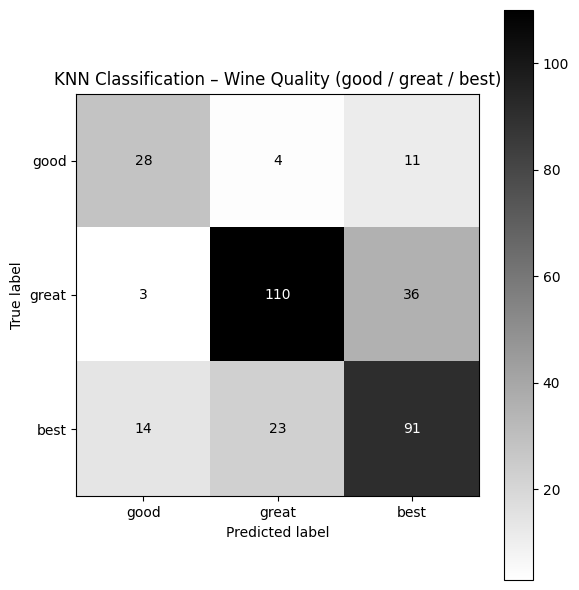

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Predictions
y_cls_pred = knn_cls.predict(X_cls_test_scaled)

# Metrics (macro average for 3 classes)
acc = accuracy_score(y_cls_test, y_cls_pred)
prec = precision_score(y_cls_test, y_cls_pred, average="macro")
rec = recall_score(y_cls_test, y_cls_pred, average="macro")
f1 = f1_score(y_cls_test, y_cls_pred, average="macro")

print("KNN Classification – Metrics (macro average)")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}\n")

print("Classification Report:\n")
print(classification_report(y_cls_test, y_cls_pred, target_names=["good", "great", "best"]))

# Confusion matrix with high-contrast colormap
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(
    y_cls_test,
    y_cls_pred,
    display_labels=["good", "great", "best"],
    cmap="gist_yarg",
    ax=ax,
    colorbar=True
)
ax.set_title("KNN Classification – Wine Quality (good / great / best)")
plt.tight_layout()
plt.show()


##KNN Classification – Evaluation Summary


- The KNN classifier was evaluated on a three-class wine quality problem (“good,” “great,” and “best”).


- The overall accuracy is 0.716, meaning the model correctly classifies about 72% of the samples.


- Macro-averaged precision, recall, and F1-scores (≈0.69–0.70) show that the model performs reasonably well across all classes, without being overly biased toward the largest class.


- The classification report highlights that the "great" category achieves the strongest scores, likely due to having the largest support, while the "good" and "best" categories show moderately strong but slightly lower performance.


- The confusion matrix provides a clear visualization of misclassifications, showing where the model tends to confuse neighboring quality levels.



## Final Conclusion


- The KNN classifier provides solid performance for wine quality prediction, achieving balanced accuracy and macro-averaged metrics across all three classes.


- The results indicate that KNN effectively captures similarities in the feature space but may still confuse adjacent quality categories due to overlapping characteristics in the dataset.


- Overall, the model delivers reliable multi-class classification performance, but tuning k, scaling strategies, or distance metrics may further enhance accuracy and reduce class confusions.

